<a href="https://colab.research.google.com/github/MJaiman/Data-Analytics/blob/main/Covid_19_Data_Analysis_Project_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET_LINK:https://drive.google.com/drive/folders/1kVcO_1xAYFTmdXVWAICLDK543Y6uSlpp?usp=sharing**

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
# !pip install squarify

**Data Preparation**

In [2]:
country_wise_latest = pd.read_csv('country_wise_latest.csv')
province_data = pd.read_csv('covid_19_clean_complete.csv')
day_wise = pd.read_csv('day_wise.csv')
group_data = pd.read_csv('full_grouped.csv')
usa_data = pd.read_csv('usa_country_wise.csv')
world_data = pd.read_csv('worldometer_data.csv')


In [3]:
province_data.shape

(49068, 10)

**Which Country has maximum Total cases, Deaths, Recovered & active cases**

In [4]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [5]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [6]:
!pip install plotly==4.5.2

In [7]:
columns=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in columns:
    fig=px.treemap(world_data[0:20],values=i,path=['Country/Region'],template="plotly_dark",title="<b>TreeMap representation of different Countries w.r.t. their {}</b>".format(i))
    fig.show()

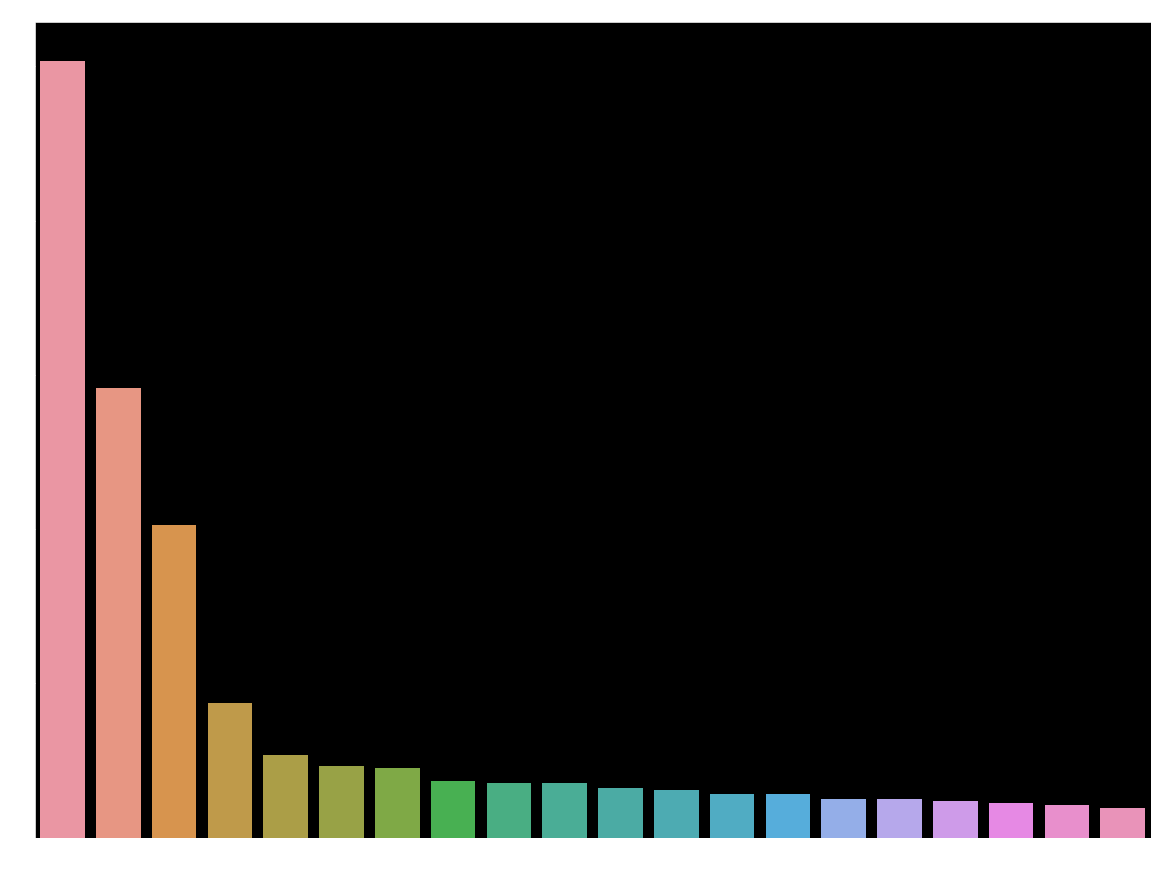

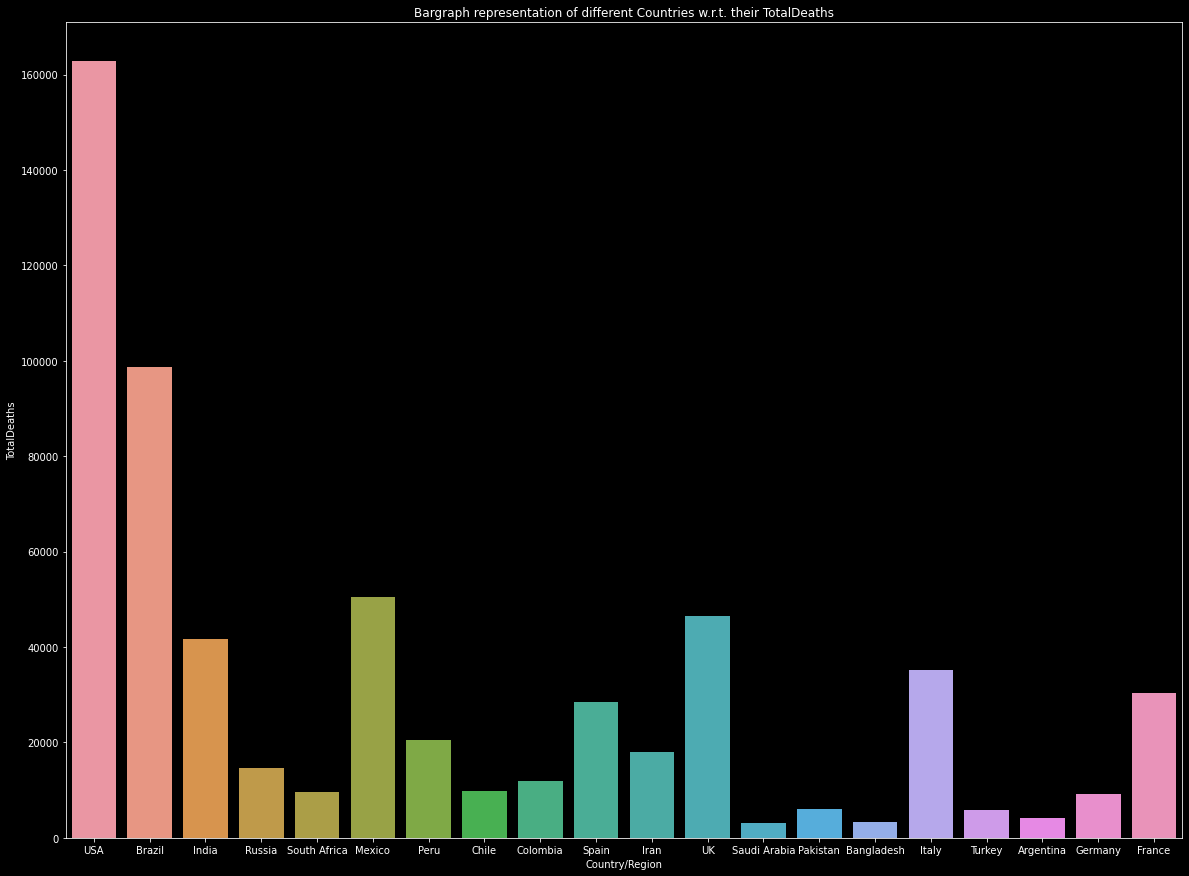

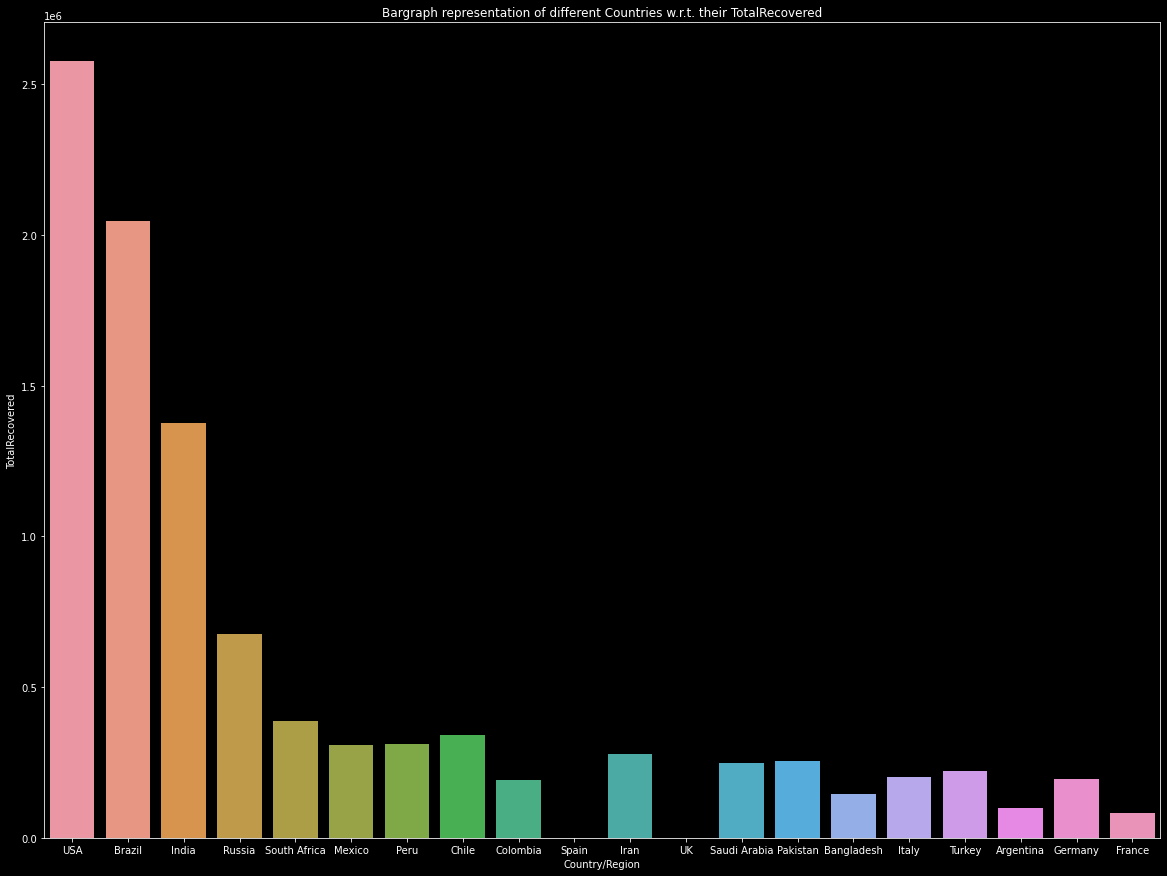

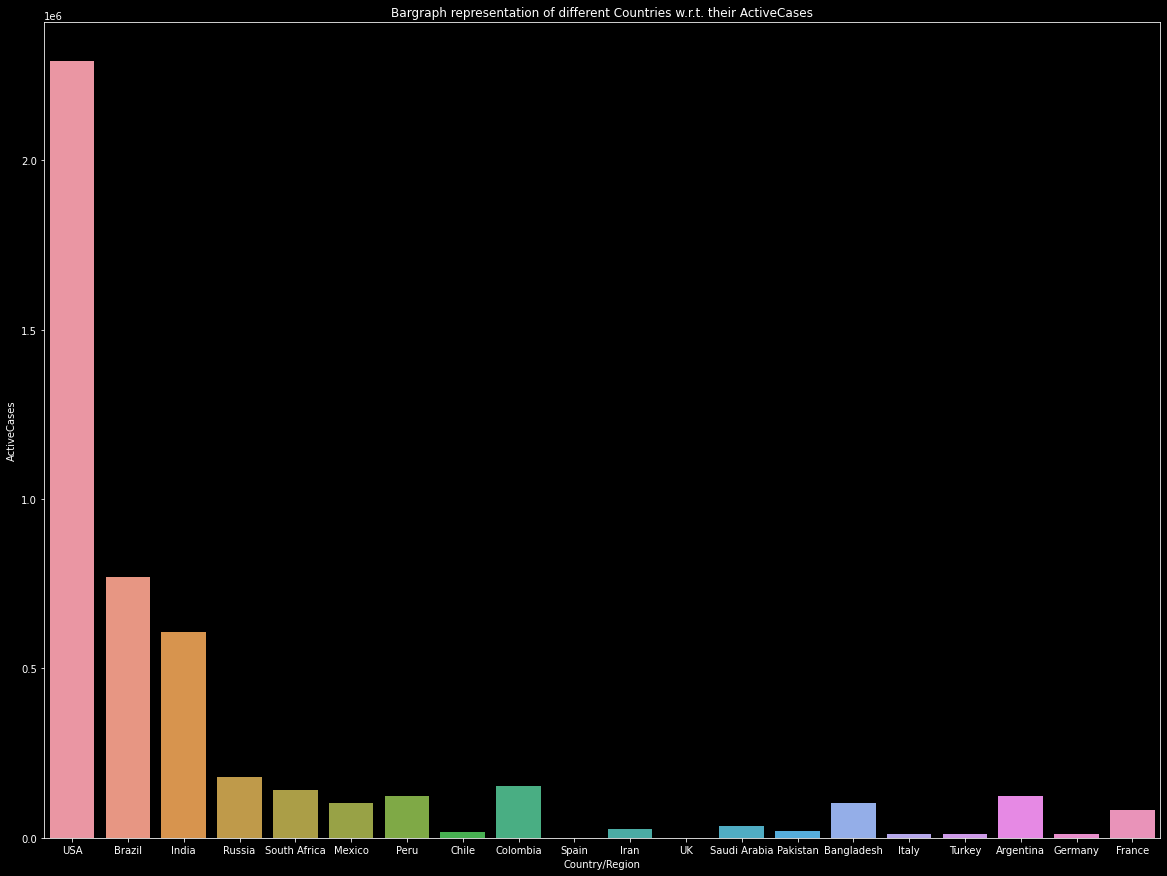

In [8]:
columns=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']

for i in columns:
  plt.figure(figsize=(20,15))
  plt.style.use("dark_background")
  sns.barplot(x=world_data['Country/Region'].iloc[0:20], y=world_data[i].iloc[0:20]).set(title='Bargraph representation of different Countries w.r.t. their {}'.format(i))


**what is the trend of Confirmed, Deaths, Recovered, Active cases**

In [9]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [10]:
day_wise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [11]:
df_melt = day_wise.melt(id_vars='Date', value_vars=['Confirmed','Deaths','Recovered','Active'])
px.line(df_melt, x='Date' , y='value' , color='variable',title="covid cases w.r.t. date",template="plotly_dark")

**Visualise Population to tests done ratio**

In [12]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [13]:
pop_test_ratio=world_data['Population']/world_data['TotalTests'].iloc[0:20]

In [14]:
px.bar(world_data.iloc[0:20], x='Country/Region', y=pop_test_ratio.iloc[0:20],title='countries w.r.t population/test ratio')

**Find 20 most affected countries**

In [15]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [16]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

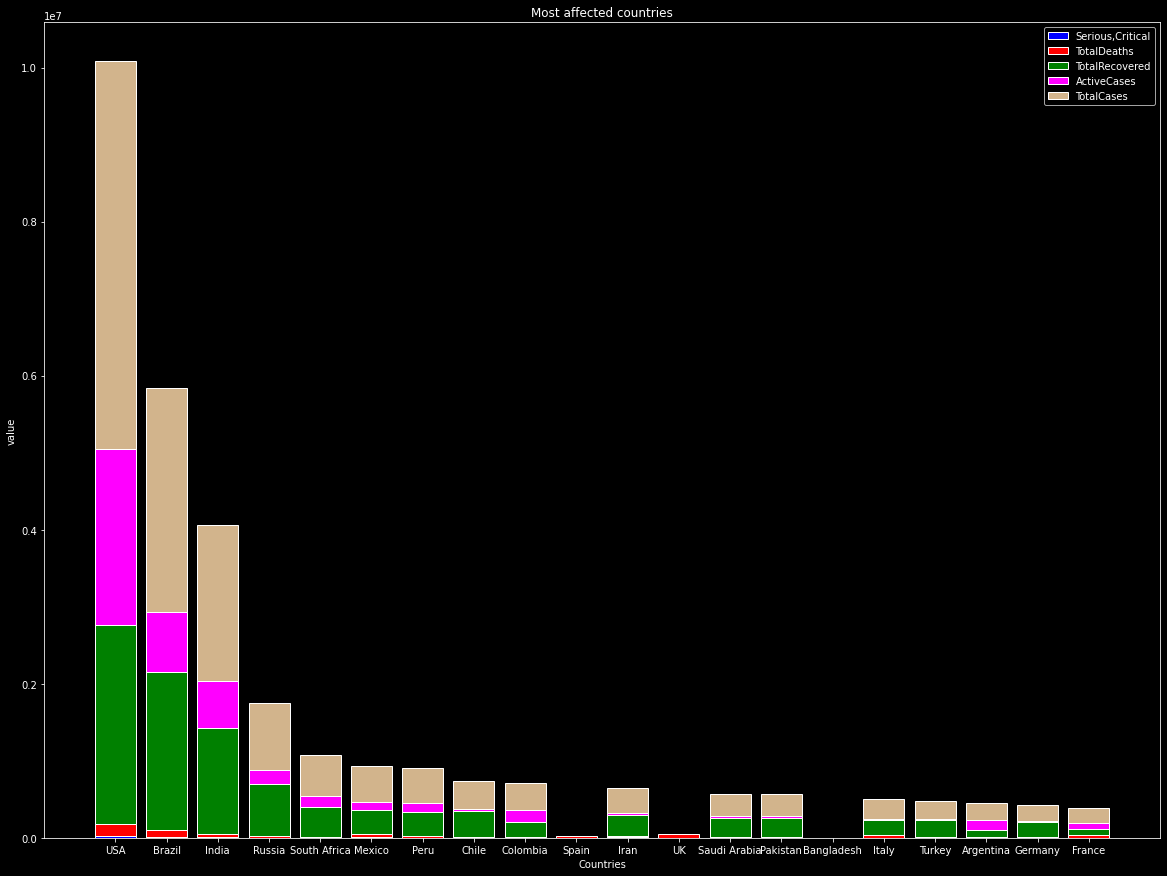

In [17]:
x=world_data['Country/Region'].iloc[0:20]
y1=world_data['Serious,Critical'].iloc[0:20]
y2=world_data['TotalDeaths'].iloc[0:20]
y3=world_data['TotalRecovered'].iloc[0:20]
y4=world_data['ActiveCases'].iloc[0:20]
y5=world_data['TotalCases'].iloc[0:20]
plt.figure(figsize=(20,15))
plt.bar(x, y1, color='b', edgecolor='white')
plt.bar(x, y2, bottom=y1, color='r', edgecolor='white')
plt.bar(x, y3, bottom=y1+y2, color='g', edgecolor='white')
plt.bar(x, y4, bottom=y1+y2+y3, color='magenta', edgecolor='white')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='tan', edgecolor='white')
plt.xlabel("Countries")
plt.ylabel("value")
plt.legend(["Serious,Critical", "TotalDeaths", "TotalRecovered", "ActiveCases","TotalCases"])
plt.title("Most affected countries")
plt.show()

**Top 20 countries of Total confirmed cases**

In [18]:
fig=px.bar(world_data.iloc[0:20],y='Country/Region',x='TotalCases',color='TotalCases',text="TotalCases",orientation='h')
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total confirmed cases</b>")
fig.show()

In [19]:
world_data.sort_values(by='TotalDeaths',ascending=False)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Saint Kitts and Nevis,North America,5.323700e+04,17,NaN,NaN,NaN,16.0,NaN,1.0,NaN,319.0,NaN,1146.0,21526.0,Americas
203,Greenland,North America,5.678000e+04,14,NaN,NaN,NaN,14.0,NaN,0.0,NaN,247.0,NaN,5977.0,105266.0,Europe
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN


**Top 20 countries of TotalDeaths cases**

In [20]:
fig=px.bar(world_data.sort_values(by='TotalDeaths',ascending=False).iloc[0:20],y='Country/Region',x=world_data['TotalDeaths'].iloc[0:20],color='TotalDeaths',text="TotalDeaths",orientation='h')
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of TotalDeaths cases</b>")
fig.show()

In [21]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

**Top 20 countries of Active Cases cases**

In [22]:
fig=px.bar(world_data.sort_values(by='ActiveCases',ascending=False).iloc[0:20],y='Country/Region',x=world_data['ActiveCases'].iloc[0:20],color='ActiveCases',text="ActiveCases",orientation='h')
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Active Cases cases</b>")
fig.show()

**Top 20 countries of Total Recovered cases**

In [23]:
fig=px.bar(world_data.sort_values(by='TotalRecovered',ascending=False).iloc[0:20],y='Country/Region',x=world_data['TotalRecovered'].iloc[0:20],color='TotalRecovered',text="TotalRecovered",orientation='h')
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total Recovered cases</b>")
fig.show()

**WHO region of 15 worst affected countries**

In [24]:
labels=world_data[0:15]['Country/Region'].values
cases=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in cases:
  fig=px.pie(world_data[0:15],values=i,names=labels,hole=0.3,title="{} recorded  w.r.t to WHO region of 15 worst affected countries.".format(i))
  fig.show()

**Deaths to confirmed ratio of worst affected countries**

In [25]:
deaths_to_confirmed_ratio=world_data['TotalDeaths']/world_data['TotalCases']
deaths_to_confirmed_ratio

0      0.032353
1      0.033810
2      0.020558
3      0.016752
4      0.017845
         ...   
204    0.076923
205         NaN
206         NaN
207         NaN
208    0.100000
Length: 209, dtype: float64

In [26]:
px.bar(world_data,x='Country/Region',y=deaths_to_confirmed_ratio,template="plotly_dark",title="Deaths to confirmed ratio of worst affected countries")

**Deaths to recovered ratio of worst affected countries**

In [27]:
deaths_to_recovered_ratio=world_data['TotalDeaths']/world_data['TotalRecovered']
deaths_to_recovered_ratio

0      0.063184
1      0.048174
2      0.030230
3      0.021595
4      0.024796
         ...   
204    0.100000
205         NaN
206         NaN
207         NaN
208    0.125000
Length: 209, dtype: float64

In [28]:
px.bar(world_data,x='Country/Region',y=deaths_to_recovered_ratio,template="plotly_dark",title="Deaths to recovered ratio of worst affected countries")

**Tests to confirmed ratio of some  worst effected countries**

In [29]:
world_data.columns


Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [30]:
tests_to_confirmed_ratio=world_data['TotalTests']/world_data['TotalCases']
tests_to_confirmed_ratio

0       12.547170
1        4.526446
2       10.935742
3       34.083165
4        5.852658
          ...    
204      4.692308
205     32.615385
206    139.692308
207           NaN
208           NaN
Length: 209, dtype: float64

In [31]:
fig = px.bar(world_data,x='Country/Region',y=tests_to_confirmed_ratio)
fig.update_layout(title={'text':"Tests to confirmed ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

**serious to Death ratio of some  worst effected countries**

In [32]:
serious_to_death=((world_data['Serious,Critical']/world_data['TotalDeaths']))
fig = px.bar(world_data,x='Country/Region',y=serious_to_death)
fig.update_layout(title={'text':"serious to Death ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

**Automating Analysis**

In [33]:
group_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [35]:
def country_visualisation(df,country):
  data=df[df['Country/Region']==country]
  data2=data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]
  fig=make_subplots(rows=1,cols=4,subplot_titles=('Confirmed','Deaths','Recovered','Active'))
  fig.add_trace(
      go.scatter(name='Confirmed',x=data2['Date'],y=data2['Confirmed']),row=1,col=1
  )
  fig.add_trace(
      go.scatter(name='Deaths',x=data2['Date'],y=data2['Deaths']),row=1,col=2
  )
  fig.add_trace(
      go.scatter(name='Recovered',x=data2['Date'],y=data2['Recovered']),row=1,col=3
  )
  fig.add_trace(
      go.scatter(name='Active',x=data2['Date'],y=data2['Active']),row=1,col=4
  )
  fig.update_layout(height=600,width=1000,title_text='Date vs Recorded cases of {}'.format(country),template="plotly_dark")
  fig.show()

In [36]:
def country_visualization(group_data,country):

    data=group_data[group_data['Country/Region']==country]

    df=data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]

    fig = make_subplots(rows=1, cols=4,subplot_titles=("Confirmed", "Active", "Recovered",'Deaths'))

    fig.add_trace(

        go.Scatter(name="Confirmed",x=df['Date'],y=df['Confirmed']),

        row=1, col=1

    )



    fig.add_trace(

        go.Scatter(name="Active",x=df['Date'],y=df['Active']),

        row=1, col=2

    )

    fig.add_trace(

        go.Scatter(name="Recovered",x=df['Date'],y=df['Recovered']),

        row=1, col=3

    )



    fig.add_trace(

        go.Scatter(name="Deaths",x=df['Date'],y=df['Deaths']),

        row=1, col=4

    )



    fig.update_layout(height=600, width=1000, title_text="Date Vs Recorded Cases of {}".format(country),template="plotly_dark")

    fig.show()

In [37]:
country_visualization(group_data,'Brazil')